<p align="center">
  <a href="https://vizuara.ai"><img src="https://vizuara.ai/logo.png" alt="Vizuara" width="150px"></a>
</p>

<h1 align="center">Logistic Regression with Regularization</h1>

<p align="center"><strong>Machine Learning: Teach by Doing</strong></p>

<p align="center">
  <a href="https://colab.research.google.com/github/VizuaraAI/Machine-Learning-Teach-by-Doing/blob/main/10_Logistic_Regression_Regularization.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.youtube.com/playlist?list=PLPTV0NXA_ZSi-nLQ4XV2Mds8Z7bihK68L"><img src="https://img.shields.io/badge/YouTube-Watch%20Tutorial-red?logo=youtube" alt="YouTube"></a>
  <a href="https://github.com/VizuaraAI/Machine-Learning-Teach-by-Doing"><img src="https://img.shields.io/badge/GitHub-Repository-black?logo=github" alt="GitHub"></a>
</p>

---

In this notebook, you'll learn **L2 regularization** to prevent overfitting. Build complex decision boundaries with polynomial features while keeping your model generalizable!

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
%matplotlib inline

**The dataset**

In [98]:
data = np.loadtxt('logistic_regression_data.csv', delimiter = ',', dtype = np.float64)
X, y = data[:, :-1], data[:, -1].reshape((-1, 1))

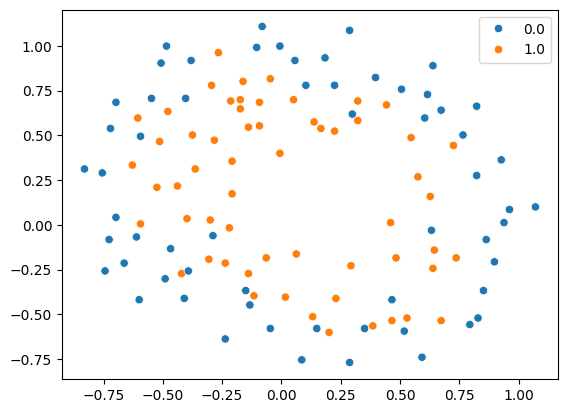

In [101]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.show()

**The sigmoid function**

In [108]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

**The cross entropy loss function**

In [109]:
def loss(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y)
    return cos

**The gradient**

In [110]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, (h - y))/len(y)
    return grad

**The feature trick**

In [112]:
def expand_feature(x1, x2, power = 2):
    #expand a 2D feature matrix to polynimial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape(-1, 1), axis = 1)
    return new_x

In [113]:
def predict(theta, X):
    return (sigmoid(np.dot(X, theta)) > 0.5).flatten()

**Gradient Descent**

In [114]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta -= alpha * np.dot(X.T, (h - y))/m
        costs.append(loss(theta, X, y))
    return theta, costs

**Implement logistic regression**

In [115]:
def logistic_regression(X, y, power = 2, alpha = 0.01, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent(X, y, theta, alpha, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

**Decide the polynomial power in the features, and the number of iterations**

In [122]:
power, num_iters = 2, 20000
predicted, theta, costs = logistic_regression(X, y, power = power, alpha = 0.6, num_iters = num_iters)

In [123]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))


The accuracy is 85.59 %


**Visualize the classifier**

/var/folders/p5/89qgg49x5zb6xp1ncdgr8h680000gn/T/ipykernel_2392/3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


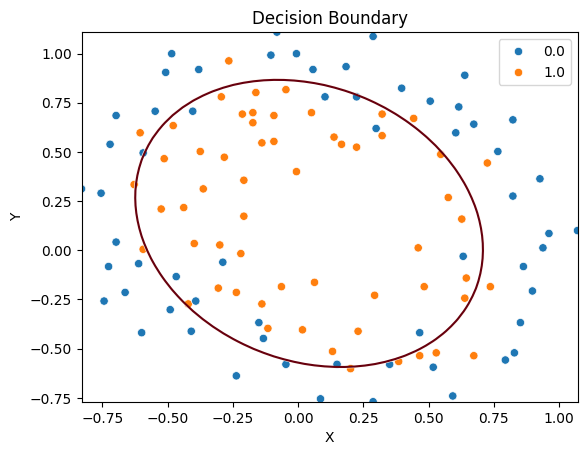

In [121]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Now let us look at regularization**

**Regularization: Cost function**

In [23]:
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y) + lam * np.sum(theta1 * theta1)/len(y)
    return cos

**Regularization: Gradient**

In [72]:
def grad_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()  
    theta1[0] = 0  
    grad = (np.dot(X.T, (h - y)) + 2 * lam * theta1)/len(y)
    return grad

**Regularization: Gradient Descent**

In [73]:
def gradient_descent_reg(X, y, theta, alpha, lam = 0, num_iters = 100):
    m = len(y)      
    costs = [] 
    
    for _ in range(num_iters):  
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()  
        theta1[0] = 0  
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1)/m
        costs.append(cost_reg(theta, X, y))
    return theta, costs

**Regularization: Logistic Regression**

In [74]:
def logistic_regression_reg(X, y, power = 2, alpha = 0.01, lam = 0, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], 1), dtype = np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict(theta, X)
    return predicted, theta, costs

**Regularization: Decide the polynomial feature, number of iterations, lambda**

In [133]:
power, num_iters = 2, 20000
lam = 0.01
predicted, theta, costs = logistic_regression_reg(X, y, power = power, alpha = 0.6, lam = lam, num_iters = num_iters)

In [134]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y.flatten())/len(y)*100))


The accuracy is 85.59 %


**Regularization: Visualize results**

/var/folders/p5/89qgg49x5zb6xp1ncdgr8h680000gn/T/ipykernel_2392/3331938992.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)


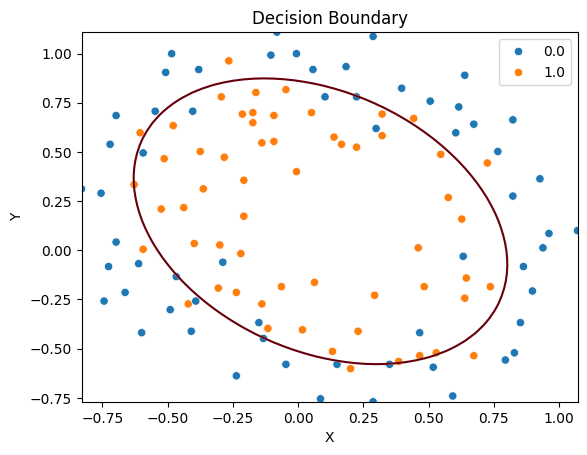

In [135]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

z = np.zeros((len(u),len(v)))

for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1), power = power),theta)   
z = np.transpose(z)

plt.contour(u,v,z,[0,0.01], cmap = "Reds")   
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()